In [ ]:
https://www.kaggle.com/anikannal/solar-power-generation-data

Data Analysis Objective :  
1. Analyse the performance of the plant interms of AC power produced. Any anomaly spotted ?   
2. Identify predictors for  AC power based on the input conditions at the plant.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
plant_1_data = pd.read_csv("Plant_1_Generation_Data.csv")

In [3]:
plant_1_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
plant_1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [5]:
plant_1_data.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [6]:
cols = plant_1_data.columns.tolist()

In [7]:
plant_1_data['date'] = pd.to_datetime(plant_1_data[cols[0]])

In [8]:
plant_1_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15


In [9]:
plant_1_data['date'].min() , plant_1_data['date'].max()

(Timestamp('2020-01-06 00:00:00'), Timestamp('2020-12-06 23:45:00'))

One year data from Jan 2020 to Dec 2020.  

In [10]:
## Read in Plant 1 Sensor Data 
plant_1_sensor_data = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")

In [11]:
plant_1_sensor_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [12]:
plant_1_sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [13]:
plant_1_sensor_data.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [14]:
plant_1_sensor_data['date'] = pd.to_datetime(plant_1_sensor_data[cols[0]])

In [15]:
plant_1_sensor_data['date'].min() , plant_1_sensor_data['date'].max()

(Timestamp('2020-05-15 00:00:00'), Timestamp('2020-06-17 23:45:00'))

Sensor data is only from May 2020 to June 2020.  

In [16]:
plant_1_data.sort_values(['date'])

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date
33112,01-06-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,829.0,6377931.0,2020-01-06 00:00:00
33133,01-06-2020 00:00,4135001,zVJPv84UY57bAof,0.0,0.0,0.0,7242024.0,2020-01-06 00:00:00
33132,01-06-2020 00:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,0.0,6463239.0,2020-01-06 00:00:00
33131,01-06-2020 00:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,1575.0,7133897.0,2020-01-06 00:00:00
33130,01-06-2020 00:00,4135001,wCURE6d3bPkepu2,0.0,0.0,0.0,6909405.0,2020-01-06 00:00:00
...,...,...,...,...,...,...,...,...
58242,12-06-2020 23:45,4135001,3PZuoBAID5Wc2HD,0.0,0.0,5900.0,7202086.0,2020-12-06 23:45:00
58241,12-06-2020 23:45,4135001,1IF53ai7Xc0U56Y,0.0,0.0,5903.0,6398227.0,2020-12-06 23:45:00
58240,12-06-2020 23:45,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5441.0,6455679.0,2020-12-06 23:45:00
58251,12-06-2020 23:45,4135001,bvBOhCH3iADSZry,0.0,0.0,2686.0,6509779.0,2020-12-06 23:45:00


In [17]:
## How many plant ids?
plant_1_data[cols[1]].value_counts()

4135001    68778
Name: PLANT_ID, dtype: int64

In [18]:
## How many sources ?
plant_1_data[cols[2]].value_counts()

bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
VHMLBKoKgIrUVDU    3133
7JYdWkrLSPkdwr4    3133
ih0vzX44oOqAx2f    3130
ZnxXDlPa8U1GXgE    3130
wCURE6d3bPkepu2    3126
z9Y9gH1T5YWrNuG    3126
pkci93gMrogZuBj    3125
uHbuxQJl8lW7ozc    3125
iCRJl6heRkivqQ3    3125
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
sjndEbLyjtCKgGv    3124
rGa61gmuvPhdLxV    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
zBIq5rxdHJRwDNY    3119
adLQvlD726eNBSB    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: SOURCE_KEY, dtype: int64

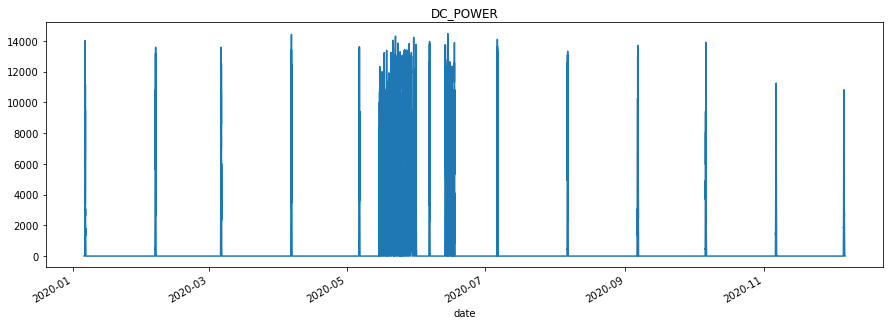

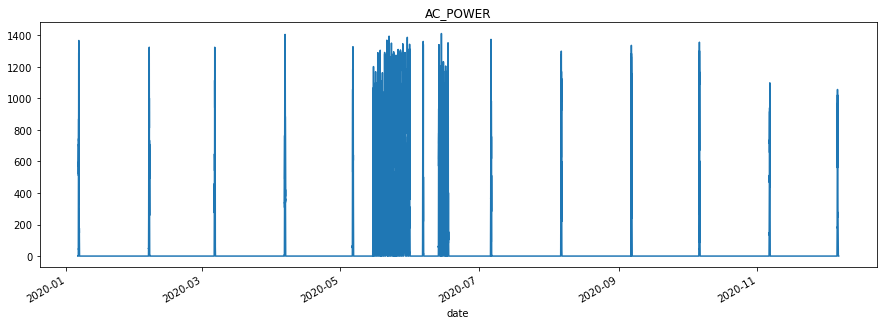

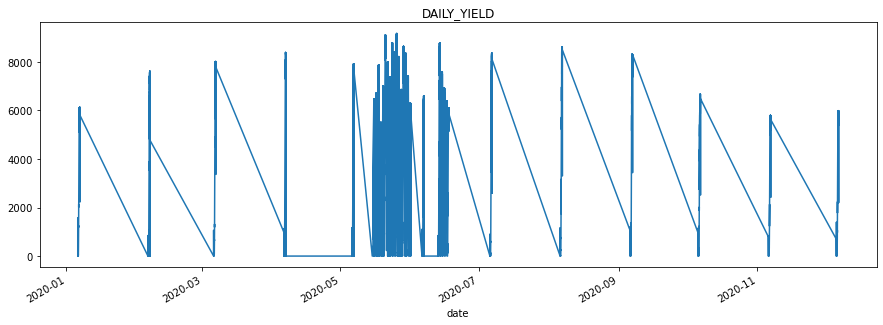

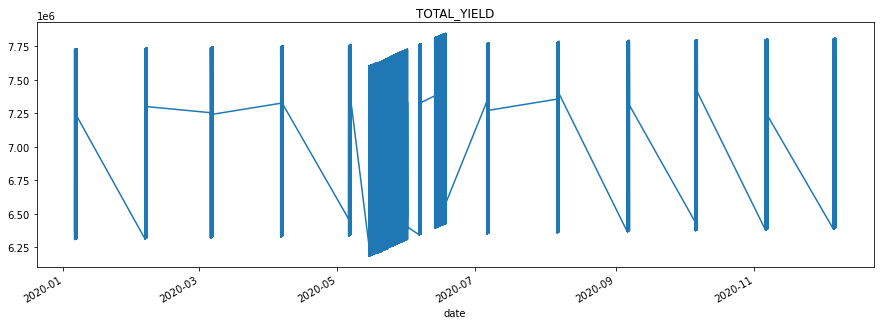

In [80]:
for c in cols[3:]:
    plt.figure(figsize = (15,5))
    plant_1_data.set_index(['date'])[c].plot()
    plt.title(c)

Text(0.5, 1.0, 'Yield for day 05/15/20')

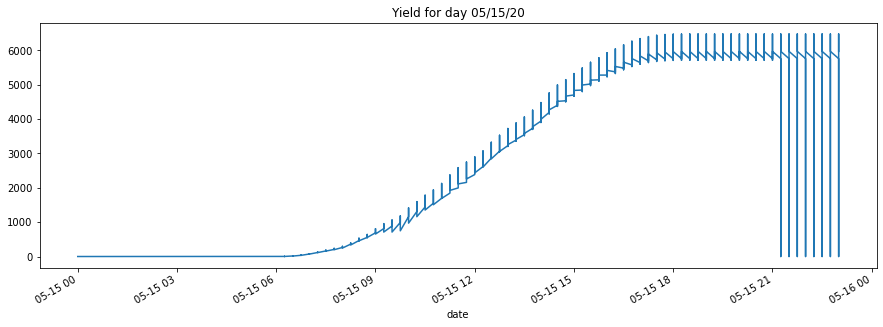

In [19]:
## Yield for a day of irradiance 
plant_1_data.set_index(['date']).loc['2020-05-15']['DAILY_YIELD'].plot(figsize = (15,5))
plt.title("Yield for day 05/15/20")

Its seen that the yield rises slowly  after 9 am and becomes maximum @17pm .

Text(0.5, 1.0, 'Yield for two consecutive days ')

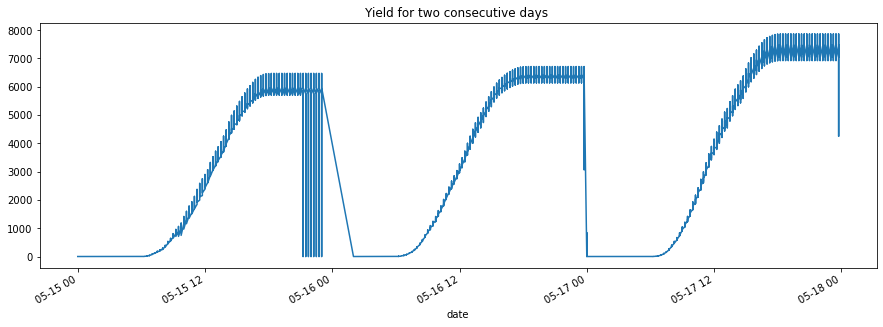

In [20]:
## Yield for two consecutive days of irradiance 
plant_1_data.set_index(['date']).loc['2020-05-15' : '2020-05-17']['DAILY_YIELD'].plot(figsize = (15,5))
plt.title("Yield for two consecutive days ")

Text(0.5, 1.0, 'Daily Yield ')

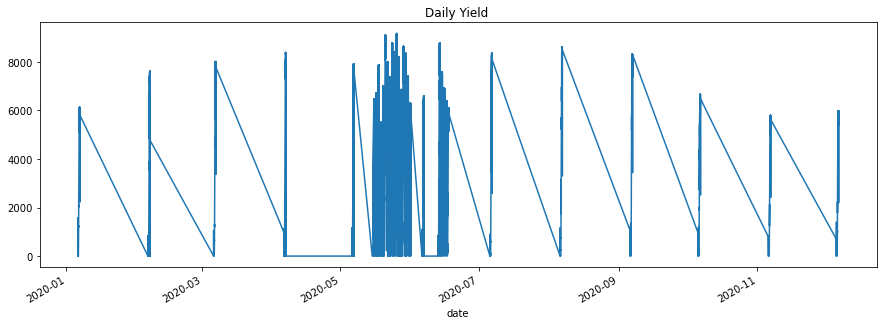

In [21]:
plant_1_data.set_index(['date'])['DAILY_YIELD'].plot(figsize = (15,5))
plt.title("Daily Yield ")

Text(0.5, 1.0, 'Power for day 05/15/20')

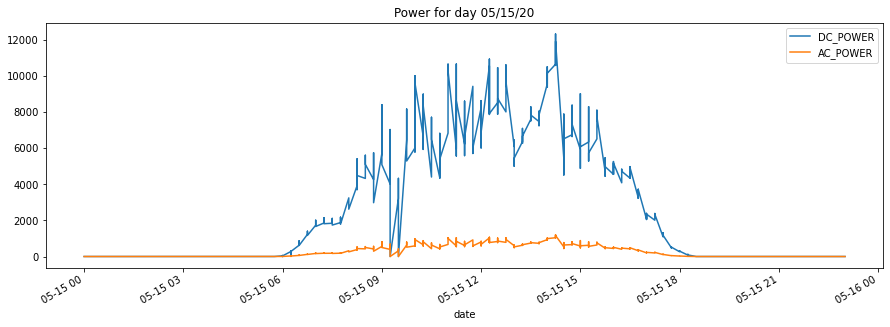

In [77]:
## Simlarly Visualize the DC and AC power for a day and two consecutive days 
plant_1_data.set_index(['date']).loc['2020-05-15'][['DC_POWER','AC_POWER']].plot(figsize = (15,5))
plt.title("Power for day 05/15/20")

Text(0.5, 1.0, 'Power for two consecutive days ')

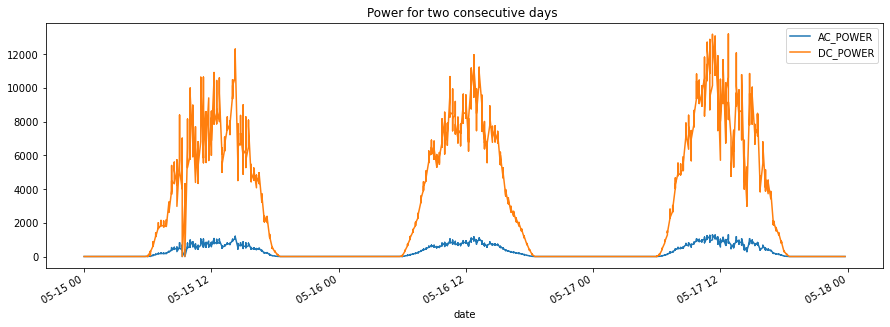

In [78]:
## Yield for two consecutive days of irradiance 
plant_1_data.set_index(['date']).loc['2020-05-15' : '2020-05-17'][['AC_POWER','DC_POWER']].plot(figsize = (15,5))
plt.title("Power for two consecutive days ")

DC and AC power is generated from morning 6am to 18pm.  

In [81]:
## Ratio of AC to DC Power
(plant_1_data[plant_1_data['DC_POWER'] > 0]['AC_POWER']/plant_1_data[plant_1_data['DC_POWER'] > 0]['DC_POWER']).mean()

0.09771886762799646

The ratio of DC to AC power is @ 10%

In [22]:
## What are the top 3 maximum yields and when was it achieved ?
plant_1_data.sort_values(['DAILY_YIELD'] , ascending = False).head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date
21134,25-05-2020 22:00,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0,2020-05-25 22:00:00
20914,25-05-2020 19:30,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0,2020-05-25 19:30:00
21046,25-05-2020 21:00,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0,2020-05-25 21:00:00
21068,25-05-2020 21:15,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0,2020-05-25 21:15:00
20848,25-05-2020 18:45,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0,2020-05-25 18:45:00
21002,25-05-2020 20:30,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0,2020-05-25 20:30:00
21090,25-05-2020 21:30,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0,2020-05-25 21:30:00
21112,25-05-2020 21:45,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0,2020-05-25 21:45:00
20870,25-05-2020 19:00,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0,2020-05-25 19:00:00
21156,25-05-2020 22:15,4135001,adLQvlD726eNBSB,0.0,0.0,9163.0,6355294.0,2020-05-25 22:15:00


Maximum Yield obtained on 25th May 2020.  

Text(0.5, 1.0, 'Daily Yield')

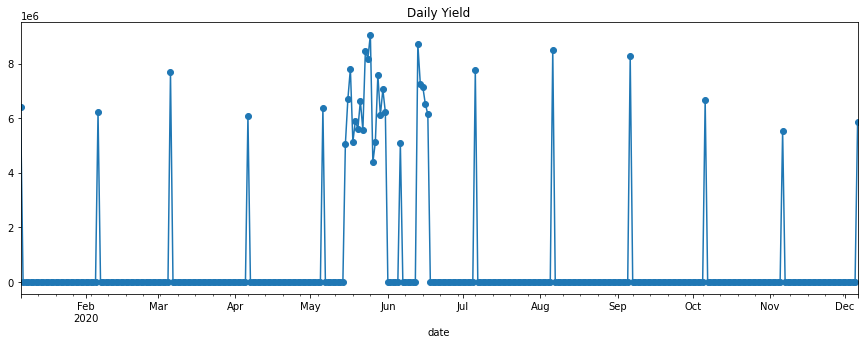

In [32]:
## How much is the daily , monthly and yearly 'daily yield' per source ? 
plant_1_data['year'] = plant_1_data['date'].dt.year
##
plant_1_data['month'] = plant_1_data['date'].dt.month
##
plant_1_data['dayofweek'] = plant_1_data['date'].dt.dayofweek
##
plant_1_data['day'] = plant_1_data['date'].dt.day
##
plant_1_data.set_index(['date']).resample('D')['DAILY_YIELD'].sum().plot(style = '-o', figsize = (15,5))
plt.title("Daily Yield")

Text(0.5, 1.0, 'Daily AC Power')

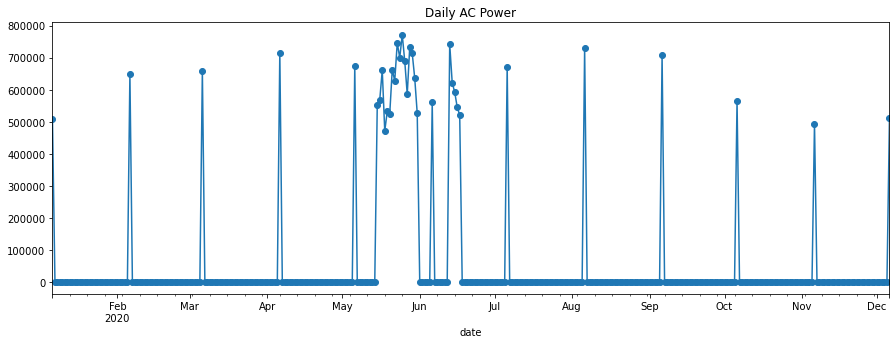

In [82]:
plant_1_data.set_index(['date']).resample('D')['AC_POWER'].sum().plot(style = '-o', figsize = (15,5))
plt.title("Daily AC Power")

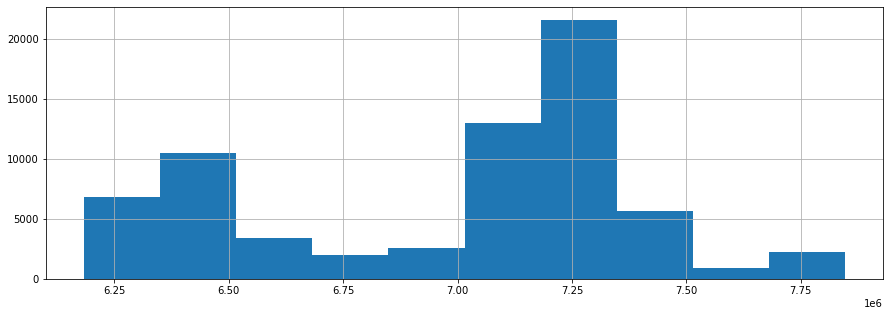

In [33]:
## Plot Distribution of Total Yield 
plant_1_data['TOTAL_YIELD'].hist(figsize = (15,5))

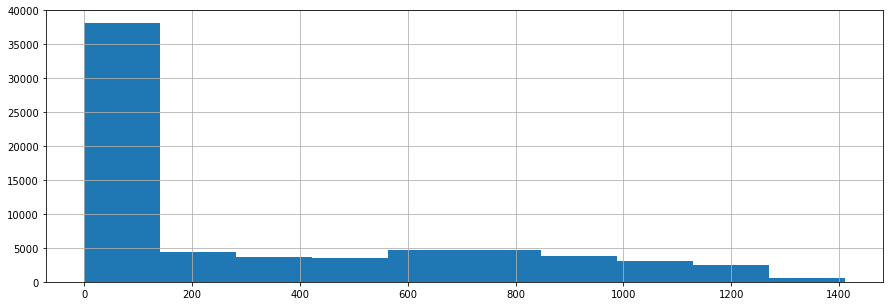

In [34]:
## Plot Distribution of AC Power
plant_1_data['AC_POWER'].hist(figsize = (15,5))

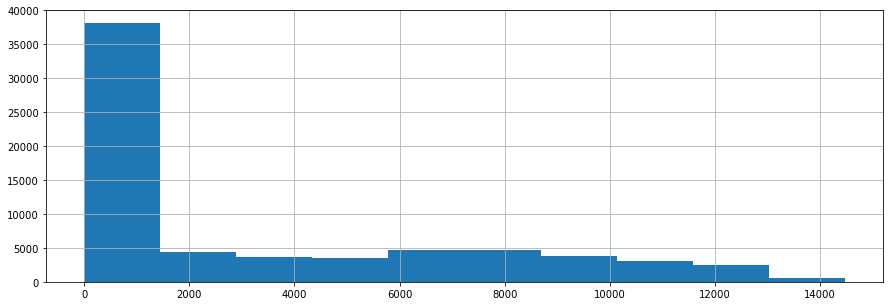

In [35]:
## Plot Distribution of DC Power
plant_1_data['DC_POWER'].hist(figsize = (15,5))

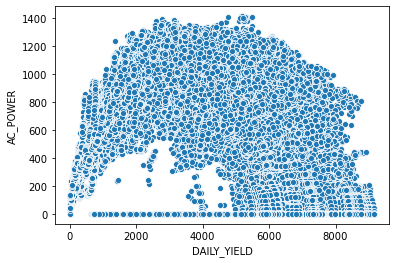

In [56]:
## Are the DAILY YIELD AND AC POWER Correlated.
sns.scatterplot('DAILY_YIELD' , 'AC_POWER', data = plant_1_data)

In [36]:
plant_1_data.corr()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,year,month,dayofweek,day
PLANT_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC_POWER,NaN,1.000000,0.999996,0.082284,0.003815,NaN,-0.027988,0.012794,0.038217
AC_POWER,NaN,0.999996,1.000000,0.082234,0.003804,NaN,-0.027899,0.012821,0.038124
DAILY_YIELD,NaN,0.082284,0.082234,1.000000,0.009867,NaN,-0.007453,0.039433,0.021221
TOTAL_YIELD,NaN,0.003815,0.003804,0.009867,1.000000,NaN,0.077972,-0.007310,-0.084760
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,-0.027988,-0.027899,-0.007453,0.077972,NaN,1.000000,0.226109,-0.287514
dayofweek,NaN,0.012794,0.012821,0.039433,-0.007310,NaN,0.226109,1.000000,0.111249
day,NaN,0.038217,0.038124,0.021221,-0.084760,NaN,-0.287514,0.111249,1.000000


Poor correlation between Daily Yield and AC Power

In [37]:
## Combine sensor data and plant data 
plant_1_sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   object        
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
 6   date                 3182 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 174.1+ KB


In [38]:
cols2 = plant_1_sensor_data.columns.tolist()

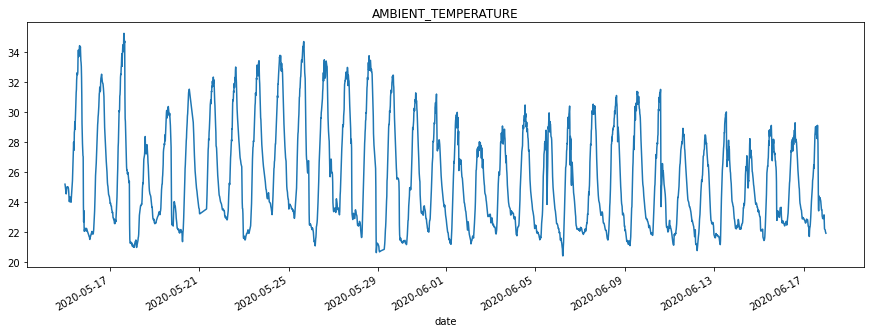

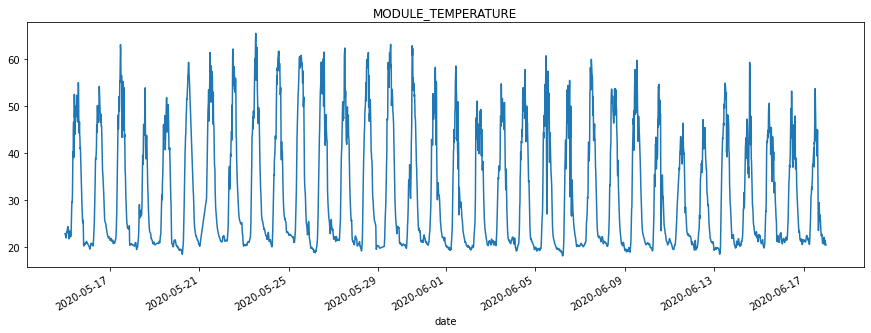

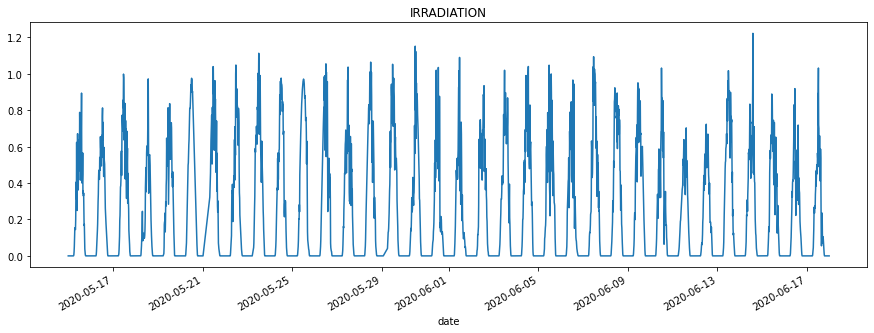

In [62]:
## Plot the sensor data 
for c in cols2[3:6]:
    plt.figure(figsize = (15,5))
    plant_1_sensor_data.set_index(['date'])[c].plot()
    plt.title(c)

Cyclic pattern is obeserved in Ambient Temperature in the interval of 15 days.  

In [39]:
plant_1_sensor_data.set_index(['date']).loc['2020-05-17']

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
date,,,,,,
2020-05-17 00:00:00,2020-05-17 00:00:00,4135001,HmiyD2TTLFNqkNe,24.170166,21.631490,0.0
2020-05-17 00:15:00,2020-05-17 00:15:00,4135001,HmiyD2TTLFNqkNe,24.011531,21.648279,0.0
2020-05-17 00:30:00,2020-05-17 00:30:00,4135001,HmiyD2TTLFNqkNe,23.894948,21.488226,0.0
2020-05-17 00:45:00,2020-05-17 00:45:00,4135001,HmiyD2TTLFNqkNe,23.936809,21.515645,0.0
2020-05-17 01:00:00,2020-05-17 01:00:00,4135001,HmiyD2TTLFNqkNe,23.879315,21.539557,0.0
...,...,...,...,...,...,...
2020-05-17 22:45:00,2020-05-17 22:45:00,4135001,HmiyD2TTLFNqkNe,21.315892,20.690883,0.0
2020-05-17 23:00:00,2020-05-17 23:00:00,4135001,HmiyD2TTLFNqkNe,21.220532,20.590588,0.0
2020-05-17 23:15:00,2020-05-17 23:15:00,4135001,HmiyD2TTLFNqkNe,21.216575,20.635392,0.0


Sensor data is for every 15 minutes   

In [40]:
plant_1_sensor_data['SOURCE_KEY'].unique()

array(['HmiyD2TTLFNqkNe'], dtype=object)

There is just one value for 'SOURCE_KEY' in the sensor data file whereas in the Plant data file , there are many values. Hence the join keys are 'date' and 'plant_id'.  

In [41]:
combined_df = pd.merge(plant_1_data , plant_1_sensor_data , on = ['date', 'PLANT_ID'], how = 'left')
combined_df.head()

,DATE_TIME_x,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date,year,month,dayofweek,day,DATE_TIME_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,2020,5,4,15,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,2020,5,4,15,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,2020,5,4,15,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,2020,5,4,15,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,2020,5,4,15,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [42]:
combined_df.shape

(68778, 17)

In [43]:
combined_df.isnull().sum()

DATE_TIME_x                0
PLANT_ID                   0
SOURCE_KEY_x               0
DC_POWER                   0
AC_POWER                   0
DAILY_YIELD                0
TOTAL_YIELD                0
date                       0
year                       0
month                      0
dayofweek                  0
day                        0
DATE_TIME_y            23098
SOURCE_KEY_y           23098
AMBIENT_TEMPERATURE    23098
MODULE_TEMPERATURE     23098
IRRADIATION            23098
dtype: int64

Since there is no sensor data values for all dates in the plant data file, we see the above NA values.These can be dropped and continue the analysis with the remaining combined records.   

In [44]:
combined_df.dropna(inplace = True)

In [45]:
combined_df.shape

(45680, 17)

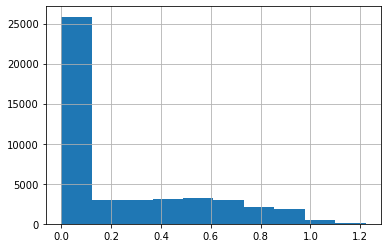

In [46]:
## plot the irradiance 
combined_df['IRRADIATION'].hist()

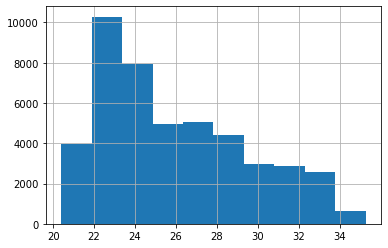

In [47]:
## plot the ambient temperature 
combined_df['AMBIENT_TEMPERATURE'].hist()

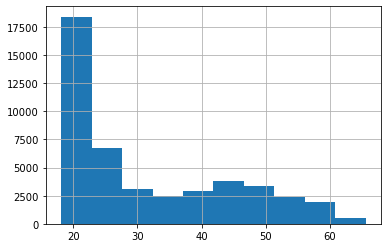

In [48]:
## plot the temperature
combined_df['MODULE_TEMPERATURE'].hist()

Text(0.5, 1.0, "'AMBIENT_TEMPERATURE'")

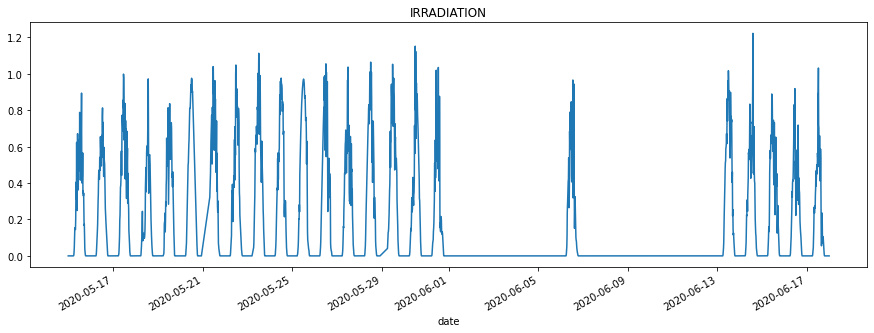

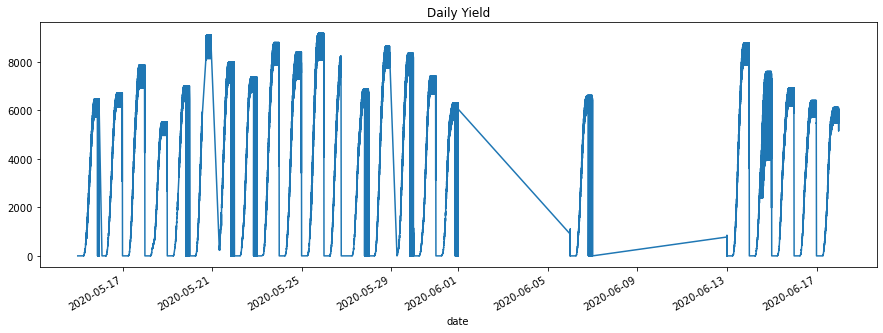

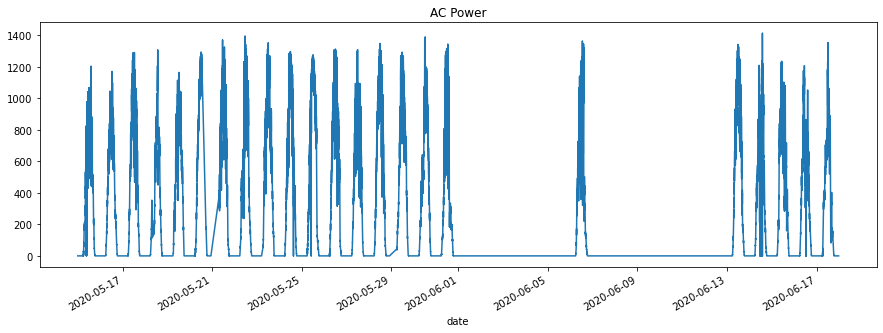

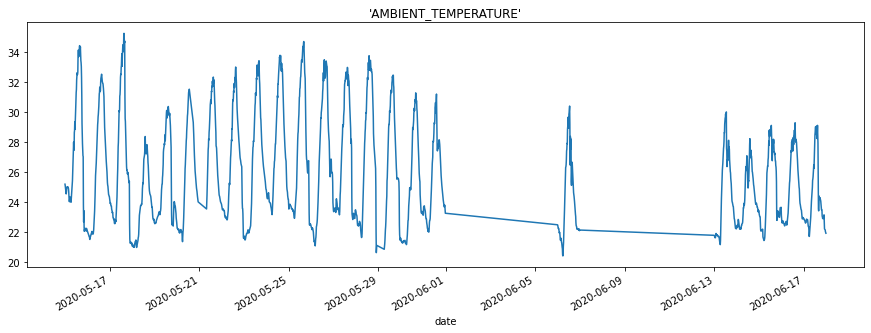

In [50]:
## Plot the Values by time.
plt.figure(figsize = (15,5))
combined_df.set_index(['date'])['IRRADIATION'].plot()
plt.title("IRRADIATION")
plt.figure(figsize = (15,5))
combined_df.set_index(['date'])['DAILY_YIELD'].plot()
plt.title("Daily Yield")
plt.figure(figsize = (15,5))
combined_df.set_index(['date'])['AC_POWER'].plot()
plt.title("AC Power")
plt.figure(figsize = (15,5))
combined_df.set_index(['date'])['AMBIENT_TEMPERATURE'].plot()
plt.title("'AMBIENT_TEMPERATURE'")

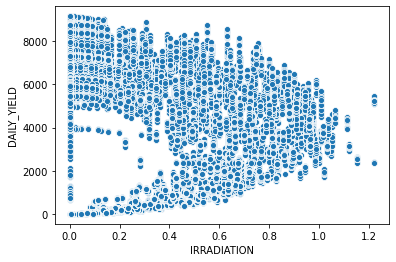

In [51]:
## scatter plot 
sns.scatterplot('IRRADIATION' , 'DAILY_YIELD', data = combined_df)

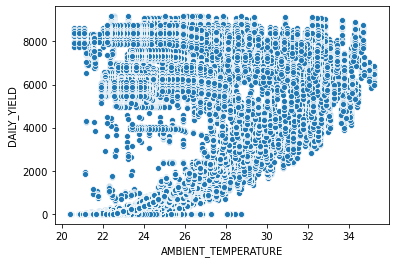

In [52]:
## scatter plot 
sns.scatterplot('AMBIENT_TEMPERATURE' , 'DAILY_YIELD', data = combined_df)

In [53]:
## Check coorelation 
combined_df.corr()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,year,month,dayofweek,day,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
PLANT_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC_POWER,NaN,1.000000,0.999996,0.076710,0.004055,NaN,-0.042781,0.021528,0.049284,0.703796,0.954692,0.991305
AC_POWER,NaN,0.999996,1.000000,0.076628,0.004043,NaN,-0.042688,0.021513,0.049162,0.704035,0.954810,0.991260
DAILY_YIELD,NaN,0.076710,0.076628,1.000000,0.007277,NaN,-0.012850,0.051664,0.030742,0.489709,0.203702,0.071937
TOTAL_YIELD,NaN,0.004055,0.004043,0.007277,1.000000,NaN,0.167196,-0.011266,-0.053243,-0.036532,-0.014713,-0.004981
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,-0.042781,-0.042688,-0.012850,0.167196,NaN,1.000000,-0.042944,-0.678315,-0.237136,-0.116531,-0.051316
dayofweek,NaN,0.021528,0.021513,0.051664,-0.011266,NaN,-0.042944,1.000000,-0.012471,0.049433,0.029491,0.025254
day,NaN,0.049284,0.049162,0.030742,-0.053243,NaN,-0.678315,-0.012471,1.000000,0.164977,0.105859,0.056562
AMBIENT_TEMPERATURE,NaN,0.703796,0.704035,0.489709,-0.036532,NaN,-0.237136,0.049433,0.164977,1.000000,0.843456,0.702218


It's seen that IRRADIATION has very good correlation with DC and AC Power and AMBIENT TEMPERATURE.    


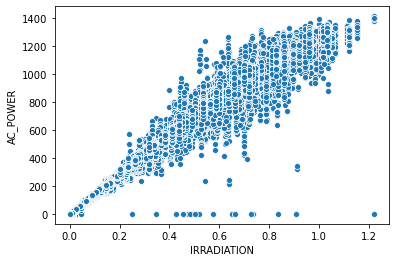

In [54]:
## Plot scatter plot to check the correlation.  
sns.scatterplot('IRRADIATION', 'AC_POWER', data = combined_df)

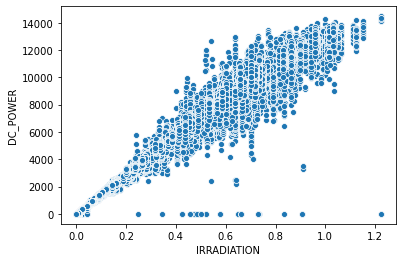

In [55]:
## 
sns.scatterplot('IRRADIATION', 'DC_POWER', data = combined_df)

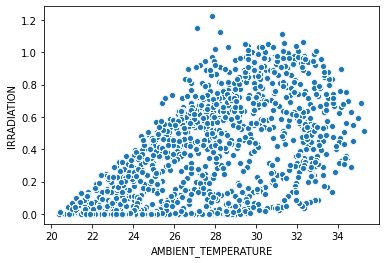

In [56]:
## 
sns.scatterplot('AMBIENT_TEMPERATURE', 'IRRADIATION', data = combined_df)

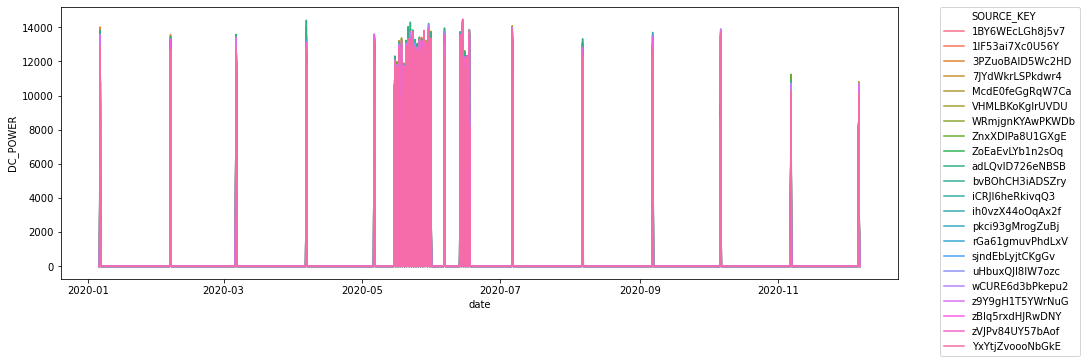

In [61]:
## Plant data is at Inverter level i.e Source_Key level . Check inverter performance by looking into AC/DC Power.
plt.figure(figsize = (15,5))
sns.lineplot('date', 'DC_POWER', data = plant_1_data , hue = 'SOURCE_KEY')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

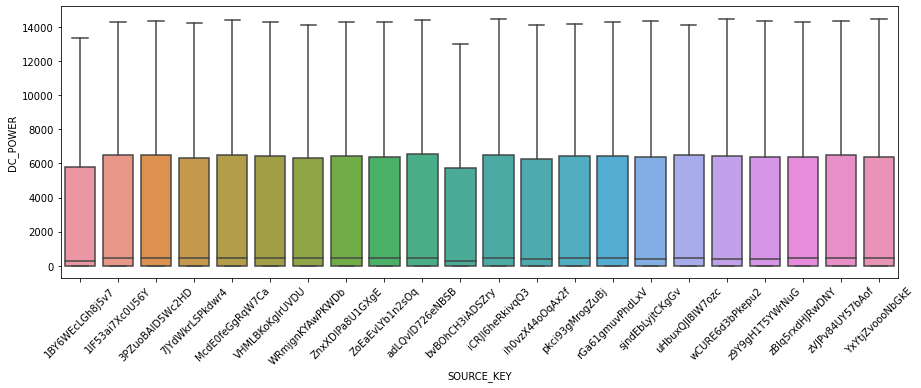

In [63]:
plt.figure(figsize = (15,5))
sns.boxplot('SOURCE_KEY', 'DC_POWER', data =  plant_1_data)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

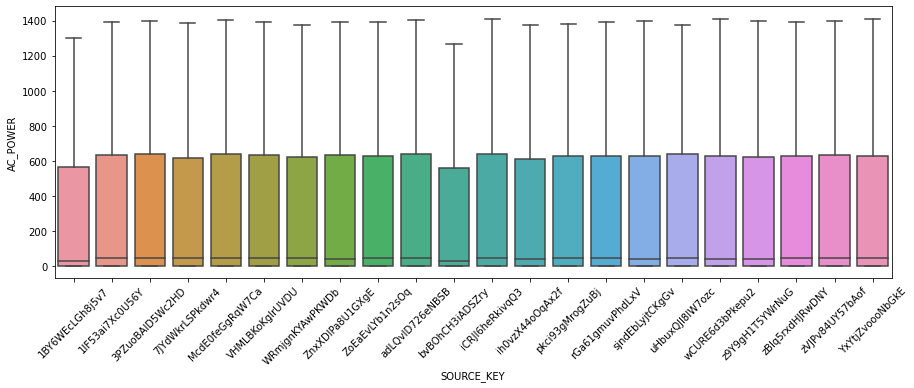

In [64]:
plt.figure(figsize = (15,5))
sns.boxplot('SOURCE_KEY', 'AC_POWER', data =  plant_1_data)
plt.xticks(rotation = 45)

Except for 2 sources/inverters , all of them have consistent output .  

In [65]:
combined_df['date'].min() , combined_df['date'].max()

(Timestamp('2020-05-15 00:00:00'), Timestamp('2020-06-17 23:45:00'))

In [66]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45680 entries, 0 to 68777
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME_x          45680 non-null  object        
 1   PLANT_ID             45680 non-null  int64         
 2   SOURCE_KEY_x         45680 non-null  object        
 3   DC_POWER             45680 non-null  float64       
 4   AC_POWER             45680 non-null  float64       
 5   DAILY_YIELD          45680 non-null  float64       
 6   TOTAL_YIELD          45680 non-null  float64       
 7   date                 45680 non-null  datetime64[ns]
 8   year                 45680 non-null  int64         
 9   month                45680 non-null  int64         
 10  dayofweek            45680 non-null  int64         
 11  day                  45680 non-null  int64         
 12  DATE_TIME_y          45680 non-null  object        
 13  SOURCE_KEY_y         45680 non-

In [74]:
combined_df.drop(['DATE_TIME_x', 'DATE_TIME_y'], axis = 1 , inplace = True)

In [75]:
combined_df.head()

,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date,year,month,dayofweek,day,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,2020,5,4,15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,2020,5,4,15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,2020,5,4,15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,2020,5,4,15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,2020,5,4,15,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


In [76]:
## save the file 
combined_df.to_csv("combined_df_1.csv", index = False)

Summary :  

Plant 1 data is from Jan 2020 to Dec 2020. How ever the sensor data is available only for a month from May to June.  
Inverter Efficieny :  The Source Key are the Inverter panel which convert the DC Power to AC. The AC Power is 1/10th of the DC Power.  
The DC Power out put of all the panels seem to be in the range of 0 to 1400 with 75% of the values being with in 600 , except for 2 inverters - where the max value is slightly lesser at 1200 and 1300.       
AC Power generation:  DC / AC Power is typically generated between 6am to 18pm every day.  
Combining the Sensor values for Temperature and Irradiation and the Plant output , it is seen that Irradiation is directly proportional to DC/AC Power and is highly correlated at 0.99.  
Ambient Temperature is also correlated to AC /DC Power at 0.7. 
